<a href="https://colab.research.google.com/github/Angel-Castro-RC/Final_NLP/blob/main/F1_2_DataEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 195: Natural Language Processing
## Loading Data and Evaluating Classification Models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F1_2_DataEvaluation.ipynb)


## References


Hugging Face *Load a dataset from the Hub tutorial*: https://huggingface.co/docs/datasets/load_hub

scikit-learn *Classification Metrics User's Guide*: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

## Installing the datasets module

Hugging Face *also* provides a lot of data sets, and there's a module for that.

If you're running in a new environment (like Colab), you'll also have to install transformers again.

In [ ]:
import sys
!{sys.executable} -m pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00


## Let's load the go_emotions dataset

The *go_emotions* dataset is a set of Reddit comments that have been labeled with 28 categories (27 emotions + neutral).

See more here: https://huggingface.co/datasets/go_emotions


In [ ]:
from datasets import load_dataset

dataset = load_dataset("go_emotions")

The dataset below are reviews in different languages

In [ ]:
from datasets import load_dataset

dataset_languages = load_dataset("amazon_reviews_multi")

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/30000 [00:00<?, ? examples/s]

## Let's explore the dataset

What does it look like when printed/displayed?

In [ ]:
print(dataset)
print(type(dataset))

In [ ]:
print(dataset_languages)
print(type(dataset_languages))

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 1200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 30000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 30000
    })
})
<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
test_dataset = dataset_languages['test']

It seems that Hugging Face has defined a special datatype for representing a dataset - `DatasetDict`

They've divided it into three parts:
* **train:** these should be used to train models
* **validation:** these should be used for testing model in the middle of training (for picking the right metaparameters, etc.)
* **test:** these should be used to evaluate the model

**Review Question:** Why is it important to train and test models on different data?

### Now let's access the test set

In [ ]:
print(dataset["test"])

Dataset({
    features: ['text', 'labels', 'id'],
    num_rows: 5427
})


In [ ]:
print(dataset_languages["test"])

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 30000
})


and from there, we can use subscript notation to access the text, labels, and ids

What are the types of these things?

In [ ]:
print( type(dataset["test"]["text"]) )
print( type(dataset["test"]["labels"]) )
print( type(dataset["test"]["id"]) )

<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
print( type(dataset_languages["test"]["review_title"]) )
print( type(dataset_languages["test"]["stars"]) )
print( type(dataset_languages["test"]["review_body"]) )

<class 'list'>
<class 'list'>
<class 'list'>


They're just basic Python lists - let's print the first few to see what they look like

In [ ]:
print("The first 5 texts:")
print( dataset["test"]["text"][0:5] )

print("\nThe first 5 labels:")
print( dataset["test"]["labels"][0:5] )

print("\nThe first 5 ids:")
print( dataset["test"]["id"][0:5] )

The first 5 texts:
['I’m really sorry about your situation :( Although I love the names Sapphira, Cirilla, and Scarlett!', "It's wonderful because it's awful. At not with.", 'Kings fan here, good luck to you guys! Will be an interesting game to watch! ', "I didn't know that, thank you for teaching me something today!", 'They got bored from haunting earth for thousands of years and ultimately moved on to the afterlife.']

The first 5 labels:
[[25], [0], [13], [15], [27]]

The first 5 ids:
['eecwqtt', 'ed5f85d', 'een27c3', 'eelgwd1', 'eem5uti']


In [ ]:
print("The first 5 texts:")
print( dataset_languages["test"]["review_title"][0:5] )
print(dataset_languages["test"]["stars"][0:5])
print(dataset_languages["test"]["review_body"][0:5])

The first 5 texts:
['Super Produkt', 'Tolles Halsband!', 'Sehr zufrieden', 'Top, sehr schönes Krönchen!', 'Sehr gut']
[5, 5, 5, 5, 5]
['Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !', 'zunächst macht der Anker Halter einen soliden Eindruck. Die Magnethalterung ist auch brauchbar. Was gar nicht geht ist die Tatsache, dass die Halterung für runde Lüftungsdüsen, anders als vom Hersteller beschrieben, nicht geeignet ist! Ständig fällt das Smartphone runter. Durch das häufige Wiederanbringen ist nun auch die Gummierung kaputt, was zur Folge hat, dass die Lüftungsdüse schön zerkratzt wird! Also Schrott, der auch noch mein Auto beschädigt! Für mich ist das nicht brauchbar!', 'Siegel sowie Verpackung war beschädigt und ware war gebraucht mit Verschleiß und 

They also made it possible to select/slice on the Dataset object itself.

In [ ]:
dataset["test"][0:5]

{'text': ['I’m really sorry about your situation :( Although I love the names Sapphira, Cirilla, and Scarlett!',
  "It's wonderful because it's awful. At not with.",
  'Kings fan here, good luck to you guys! Will be an interesting game to watch! ',
  "I didn't know that, thank you for teaching me something today!",
  'They got bored from haunting earth for thousands of years and ultimately moved on to the afterlife.'],
 'labels': [[25], [0], [13], [15], [27]],
 'id': ['eecwqtt', 'ed5f85d', 'een27c3', 'eelgwd1', 'eem5uti']}

But which emotions are represented by those numbers 25, 0, 13, 15, and 27?

A `dataset` has a `features` attribute which stores this information

In [ ]:
dataset["test"].features

{'text': Value(dtype='string', id=None),
 'labels': Sequence(feature=ClassLabel(names=['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'], id=None), length=-1, id=None),
 'id': Value(dtype='string', id=None)}

In [ ]:
dataset_languages["test"].features

{'review_id': Value(dtype='string', id=None),
 'product_id': Value(dtype='string', id=None),
 'reviewer_id': Value(dtype='string', id=None),
 'stars': Value(dtype='int32', id=None),
 'review_body': Value(dtype='string', id=None),
 'review_title': Value(dtype='string', id=None),
 'language': Value(dtype='string', id=None),
 'product_category': Value(dtype='string', id=None)}

and you can get the string for an individual feature like this:

In [ ]:
stars_list = dataset_languages["test"]["stars"]

# Now, you can use the int2str method to convert an integer to its string representation
star_strings = [str(star) for star in stars_list[:5]]
# Print the result
print(star_strings)

['1', '1', '1', '1', '1']


## Using the dataset with a model

So, let's put it all together

In [ ]:
from transformers import pipeline
from datasets import load_dataset

dataset = load_dataset("go_emotions")
classifier = pipeline("sentiment-analysis", model="SamLowe/roberta-base-go_emotions")

results = classifier(dataset["test"]["text"][0:70])
#print("Here are the predictions")
#print(results)

total_correct = 0

#comparing to the actual labels
for idx in range (70):
    #print("\nText:",dataset["test"]["text"][idx])
    predicted_label = results[idx]["label"]
    actual_label_numeric = dataset["test"]["labels"][idx][0]
    actual_label = dataset["test"].features["labels"].feature.int2str( actual_label_numeric )
    #print("Predicted label:",predicted_label,", Actual label:",actual_label)
    if predicted_label == actual_label:
        total_correct += 1

print("Accuracy:",(total_correct/70))

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Accuracy: 0.6142857142857143


In [ ]:
import random
from transformers import pipeline
from datasets import load_dataset

dataset_languages = load_dataset("amazon_reviews_multi")
classifier = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")


def calculate_accuracy(actual_label, predicted_label, tolerance=1):
    return 1  if (actual_label - predicted_label) <= tolerance else 0

total_correct = 0
total_samples = 0

num_samples = 20


#comparing to the actual labels
for idx in range(num_samples):
    # Choose a random index
    random_index = random.randint(0, len(dataset_languages["test"]) - 1)

    # Get the actual star rating for the random review
    actual_label_numeric = dataset_languages["test"]["stars"][random_index]

    # Get the review title for the random review
    review_title = dataset_languages["test"]["review_title"][random_index]

    # Use the classifier to predict sentiment
    results = classifier(review_title)

    # Extract the predicted label
    predicted_label = int(results[0]["label"].split(" ")[0])

    # Check if the predicted label matches the actual label
    if predicted_label == actual_label_numeric:
        total_correct += 1

    # Print the results for this sample
    print(f"Sample {total_samples + 1} - Predicted: {predicted_label}, Actual: {actual_label_numeric}")

    total_samples += 1

# Calculate accuracy over all random samples
accuracy_percentage = (total_correct / num_samples) * 100
# Print the overall accuracy
print("\nAccuracy on", num_samples, "random samples:", round(accuracy_percentage), "%")

KeyboardInterrupt: ignored

**Test it out:** Do this for a larger portion of the test set (it might take a while)
- This will go faster if you can run on a GPU/TPU
- In Colab, do Runtime -> Change runtime type (The pipeline should automatically try to use a GPU if it is available)
- Comment out the print statements for individual results

## Making it work with the scikit-learn metrics

**Review:** The `scikit-learn` library has lots of functions for calculating metrics of machine-learning predictions.

Reference: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

To get this to work with our experiment, just make lists for your predicted and actual labels

In [ ]:
from transformers import pipeline
from datasets import load_dataset

dataset = load_dataset("go_emotions")
classifier = pipeline("sentiment-analysis", model="SamLowe/roberta-base-go_emotions")

results = classifier(dataset["test"]["text"][0:10])

predicted_labels = []
actual_labels = []

for idx in range(10):
    predicted_labels.append(results[idx]["label"])
    actual_label_numeric = dataset["test"]["labels"][idx][0]
    actual_labels.append( dataset["test"].features["labels"].feature.int2str( actual_label_numeric ) )



### accuracy

Now we can calculate accuracy using `sklearn`'s `accuracy_score`

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(actual_labels,predicted_labels) )

Accuracy: 0.7


This seems pretty good for 28 categories

if you were just guessing randomly, you'd get 1/28 ~= 0.036

if you always guess the most common label (neutral), you'd get ~ 0.30

### precision, recall, f1 scores

You can display all of these with the classification report - higher numbers are better.

**precision:** Of all the instances that the model predicted as **admiration**, how many were actually **admiration**?

**recall:** Of all the actual **admiration** instances in the dataset, how many did the model correctly predict as **admiration**?

**f1:** Combination balancing *precision* and *recall*

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(actual_labels,predicted_labels,zero_division=0))

              precision    recall  f1-score   support

  admiration       0.50      1.00      0.67         1
  excitement       0.00      0.00      0.00         1
   gratitude       1.00      0.75      0.86         4
     neutral       1.00      1.00      1.00         1
    optimism       0.00      0.00      0.00         0
     remorse       0.50      1.00      0.67         1
     sadness       1.00      0.50      0.67         2

    accuracy                           0.70        10
   macro avg       0.57      0.61      0.55        10
weighted avg       0.80      0.70      0.71        10



It seems to perform well on emotions like amusement and gratitude, but not as well on realization or annoyance.

### confusion matrix

display a confusion matrix to see which labels are getting confused with others

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

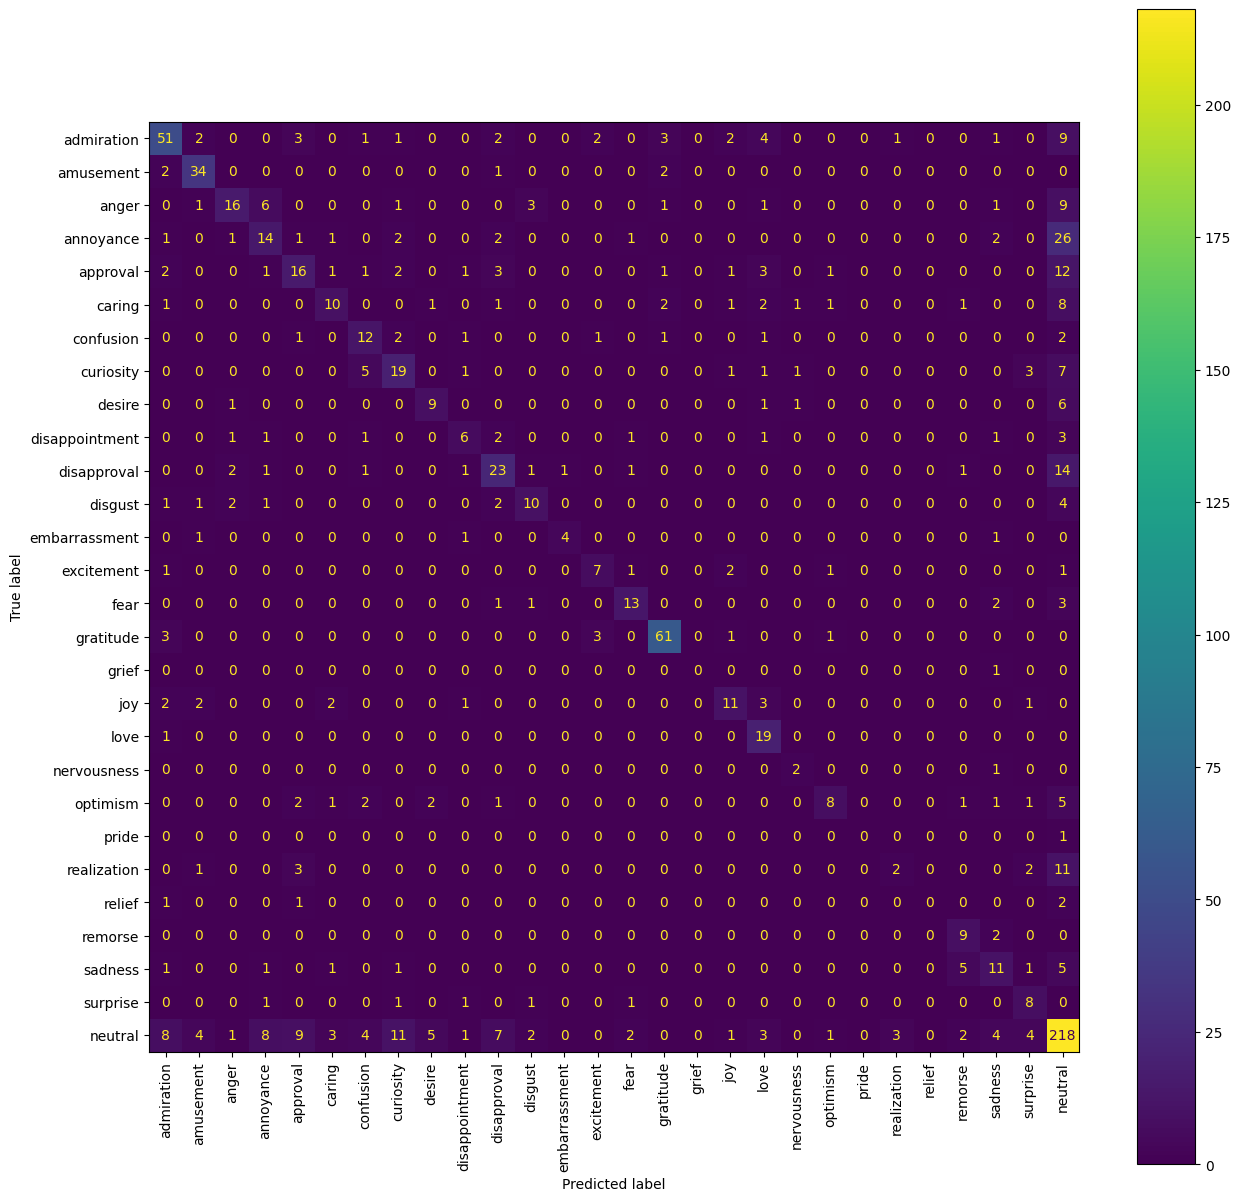

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

label_names = dataset["test"].features["labels"].feature.names
fig, ax = plt.subplots(figsize=(15, 15))
cm = confusion_matrix(actual_labels,predicted_labels,labels=label_names)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
cmd.plot(ax=ax,xticks_rotation='vertical',)

plt.show()

neutral is the most common, so it gets confused with others most

also notice sometimes others get confused: love and approval, optimism and desire, etc.

## Group work

Choose **two** of the new *text classification* models your group experimented with last week that you can find the datasets for (https://huggingface.co/datasets if not linked directly).

Split into two subgroups
* each subgroup: evaluate one of the models using the metrics shown here

**Prepare to debrief:** I will have you present at least one set of results per group.

## Running inference on other datasets

Let's do this again, but use the default positive/negative sentiment analysis model and see how it does with the `go_emotions` data.

We do need to tell the confusion matrix about the labels from the classifier too: `["POSITIVE","NEGATIVE"]`

In [ ]:
from transformers import pipeline
from datasets import load_dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dataset = load_dataset("go_emotions")
classifier = pipeline("sentiment-analysis")

results = classifier(dataset["test"]["text"][0:1000])

predicted_labels = []
actual_labels = []

for idx in range(1000):
    predicted_labels.append(results[idx]["label"])
    actual_label_numeric = dataset["test"]["labels"][idx][0]
    actual_labels.append( dataset["test"].features["labels"].feature.int2str( actual_label_numeric ) )


label_names = ["POSITIVE","NEGATIVE"]+dataset["test"].features["labels"].feature.names
fig, ax = plt.subplots(figsize=(15, 15))
cm = confusion_matrix(actual_labels,predicted_labels,labels=label_names)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
cmd.plot(ax=ax,xticks_rotation='vertical',)

plt.show()

KeyboardInterrupt: ignored

emotions like anger, annoyance, and disapproval often result in a NEGATIVE prediction

admiration, gratitude, and love often result in a POSITIVE prediction

You could manually sort the emotions into POSITIVE and NEGATIVE and run your own experiment to measure how well it does on this data.

## Applied Exploration

Go to the Hugging Face models page: https://huggingface.co/models
* Click `Text Classification`
* Find a different model and a dataset appropriate for testing it with than the ones we worked with today
    - many models will link to the datasets they were trained on, but you can find others at https://huggingface.co/datasets
    - write down some info about the models you found
        - what is it for?
        - who made it?
        - what kind of data was it trained on?
        - are they based on some other model and trained on new data (*fine-tuned*) for a specific task?
    - write down some info on the dataset you found
        - where did it come from?
        - how big is it?
        - what kind of labels does it classify?
* Evaluate the performance
    - use some of the metrics we talked about today
    - describe in your own words how it performed
    

Is base on predictions of reviws on sentiment on review of producst and giving it a review of 1-5 starsi

is base and train on reviews on products


In [ ]:
import random
from transformers import pipeline
from datasets import load_dataset

dataset_languages = load_dataset("amazon_reviews_multi")
classifier = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")


def calculate_accuracy(actual_label, predicted_label, tolerance=1):
    if (actual_label - predicted_label) <= tolerance:
        return 1
    else:
        return 0

total_correct = 0
total_samples = 0

num_samples = 50


#comparing to the actual labels
for idx in range(num_samples):
    # get a random index
    random_index = random.randint(0, len(dataset_languages["test"]) - 1)

    # get the actual star rating for the random review
    actual_label_numeric = dataset_languages["test"]["stars"][random_index]

    # get the review title for the random review
    review_title = dataset_languages["test"]["review_title"][random_index]
    review_language = dataset_languages["test"]["language"][random_index]

    # use the classifier to predict sentiment
    results = classifier(review_title)

    # extract the predicted label
    predicted_label = int(results[0]["label"].split(" ")[0])

    # check if the predicted label matches the actual label
    if predicted_label == actual_label_numeric:
        total_correct += 1

    # print the results for this sample
    print("Sample " + str(total_samples + 1) + " - Predicted: " + str(predicted_label) + ", Actual: "  + str(actual_label_numeric) + "- Langage: " +  str(review_language))
    total_samples += 1

# get accuracy over all random samples
accuracy_percentage = (total_correct / num_samples) * 100
# print the overall accuracy
print("\nAccuracy on", num_samples, "random samples:", round(accuracy_percentage), "%")

Sample 1 - Predicted: 5, Actual: 5- Langage: ja
Sample 2 - Predicted: 5, Actual: 2- Langage: ja
Sample 3 - Predicted: 3, Actual: 4- Langage: zh
Sample 4 - Predicted: 3, Actual: 3- Langage: es
Sample 5 - Predicted: 5, Actual: 5- Langage: en
Sample 6 - Predicted: 1, Actual: 2- Langage: zh
Sample 7 - Predicted: 1, Actual: 1- Langage: zh
Sample 8 - Predicted: 5, Actual: 4- Langage: de
Sample 9 - Predicted: 5, Actual: 4- Langage: es
Sample 10 - Predicted: 3, Actual: 4- Langage: en
Sample 11 - Predicted: 5, Actual: 4- Langage: de
Sample 12 - Predicted: 1, Actual: 1- Langage: fr
Sample 13 - Predicted: 3, Actual: 1- Langage: ja
Sample 14 - Predicted: 2, Actual: 1- Langage: en
Sample 15 - Predicted: 5, Actual: 5- Langage: de
Sample 16 - Predicted: 4, Actual: 4- Langage: zh
Sample 17 - Predicted: 4, Actual: 5- Langage: ja
Sample 18 - Predicted: 1, Actual: 2- Langage: es
Sample 19 - Predicted: 4, Actual: 4- Langage: de
Sample 20 - Predicted: 4, Actual: 4- Langage: fr
Sample 21 - Predicted: 5, Act

In [ ]:
import random
from transformers import pipeline
from datasets import load_dataset

dataset_languages = load_dataset("amazon_reviews_multi")
classifier = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

language_accuracy = {}

num_samples = 50

for idx in range(num_samples):
    random_index = random.randint(0, len(dataset_languages["test"]) - 1)
    actual_label_numeric = dataset_languages["test"]["stars"][random_index]
    review_title = dataset_languages["test"]["review_title"][random_index]
    review_language = dataset_languages["test"]["language"][random_index]

    results = classifier(review_title)
    predicted_label = int(results[0]["label"].split(" ")[0])

    if review_language not in language_accuracy:
        language_accuracy[review_language] = {"correct": 0, "total": 0}

    if predicted_label == actual_label_numeric:
        language_accuracy[review_language]["correct"] += 1

    language_accuracy[review_language]["total"] += 1

    print(f"Sample {idx + 1} - Predicted: {predicted_label}, Actual: {actual_label_numeric} - Language: {review_language}")

for language, stats in language_accuracy.items():
    accuracy_percentage = (stats["correct"] / stats["total"]) * 100
    print(f"Accuracy for Language '{language}': {accuracy_percentage:.2f}% ({stats['correct']} correct out of {stats['total']})")


Sample 1 - Predicted: 3, Actual: 4 - Language: ja
Sample 2 - Predicted: 3, Actual: 3 - Language: en
Sample 3 - Predicted: 1, Actual: 2 - Language: es
Sample 4 - Predicted: 5, Actual: 1 - Language: en
Sample 5 - Predicted: 1, Actual: 2 - Language: de
Sample 6 - Predicted: 2, Actual: 3 - Language: zh
Sample 7 - Predicted: 5, Actual: 5 - Language: fr
Sample 8 - Predicted: 5, Actual: 4 - Language: fr
Sample 9 - Predicted: 5, Actual: 4 - Language: fr
Sample 10 - Predicted: 3, Actual: 3 - Language: ja
Sample 11 - Predicted: 2, Actual: 5 - Language: zh
Sample 12 - Predicted: 2, Actual: 1 - Language: ja
Sample 13 - Predicted: 1, Actual: 4 - Language: de
Sample 14 - Predicted: 2, Actual: 1 - Language: ja
Sample 15 - Predicted: 1, Actual: 1 - Language: en
Sample 16 - Predicted: 3, Actual: 5 - Language: zh
Sample 17 - Predicted: 1, Actual: 2 - Language: zh
Sample 18 - Predicted: 1, Actual: 1 - Language: es
Sample 19 - Predicted: 4, Actual: 5 - Language: fr
Sample 20 - Predicted: 2, Actual: 2 - La

In [ ]:
import random
from transformers import pipeline
from datasets import load_dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dataset_languages = load_dataset("amazon_reviews_multi")
classifier = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")


def calculate_accuracy(actual_label, predicted_label, tolerance=1):
    if (actual_label - predicted_label) <= tolerance:
        return 1
    else:
        return 0
total_correct = 0
total_samples = 0

actual_labels =[]
predicted_labels = []
num_samples = 100


#comparing to the actual labels
for idx in range(num_samples):
    random_index = random.randint(0, len(dataset_languages["test"]) - 1)
    actual_label_numeric = dataset_languages["test"]["stars"][random_index]
    review_title = dataset_languages["test"]["review_title"][random_index]
    results = classifier(review_title)
    predicted_label = int(results[0]["label"].split(" ")[0])
    actual_labels.append(actual_label_numeric)
    predicted_labels.append(predicted_label)
    if predicted_label == actual_label_numeric:
        total_correct += 1
    total_samples += 1


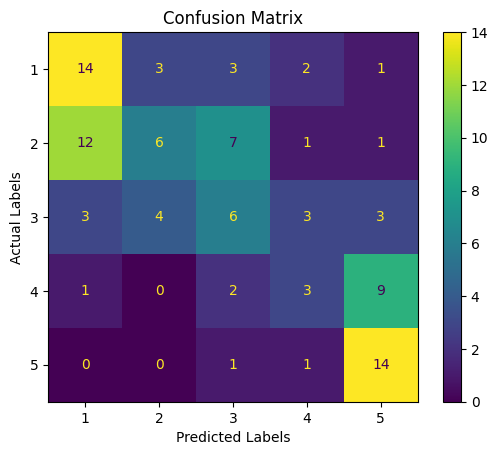

In [ ]:
confusion = confusion_matrix(actual_labels, predicted_labels)
display = ConfusionMatrixDisplay(confusion, display_labels=range(1, 6))
display.plot(cmap='viridis', values_format='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

## Applied Exploration

Go to the Hugging Face models page: https://huggingface.co/models
* Click `Text Classification`
* Find a different model and a dataset appropriate for testing it with than the ones we worked with today
    - many models will link to the datasets they were trained on, but you can find others at https://huggingface.co/datasets
    - write down some info about the models you found
        - what is it for?

        sentiment analysis on product reviews in six languages

        - who made it?

        nlptown

        - what kind of data was it trained on?

        on product reviews in six languages

        - are they based on some other model and trained on new data (*fine-tuned*) for a specific task?

        bert-base-multilingual-uncased-sentimen
        it was fine tune for product review or for farther tuning on related sentiment analysis

    - write down some info on the dataset you found
        - where did it come from?
        
        Huggingface datasets section  

        - how big is it?

        i focus on test which has 30000 and the overall dataset has 1.26M rows

        - what kind of labels does it classify?

        Positive Sentiment
        Negative Sentiment
        Neutral Sentiment
        Very Positive Sentiment
        Very Negative Sentiment

* Evaluate the performance
    - use some of the metrics we talked about today

    - describe in your own words how it performed
    
      the metrics that i use were to get accuracy and show a confusion matrix to see how well the sentiment classification is working and shows the strengths and weakness

**Gonzalo**
***
**Jack**
***
**k**